# Import Libraries

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1- Loading Data

In [113]:
filepath="../project/data/"
data = pd.read_csv(f"{filepath}train.csv")
pd.set_option('display.max_colwidth', None)
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


# 2- Dataset information


Training set information:
---------


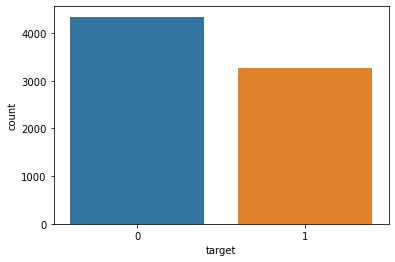

Input data has 7613 rows and, 5 column

Proportion of samples with label 1 (ie A real disaster tweet): 42.97 %
Proportion of samples with label 0 (ie Not a real disaster tweet): 57.03 %

Number of Missing Tweets = 0
Number of Missing Targets = 0


In [114]:
print("\nTraining set information:")
print("---------")
sns.countplot(x="target", data=data)
plt.show()

print(f'Input data has {len(data)} rows and, {len(data.columns)} column\n')

print("Proportion of samples with label 1 (ie A real disaster tweet):", np.round(data["target"].sum()/len(data)*100,2), "%")
print("Proportion of samples with label 0 (ie Not a real disaster tweet):", np.round((1-data["target"].sum()/len(data))*100,2),"%\n")


print(f'Number of Missing Tweets = {data["text"].isnull().sum()}')
print(f'Number of Missing Targets = {data["target"].isnull().sum()}')

# Resample Data

In [115]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['target']==1)] 
df_minority = data[(data['target']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 3300, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

-->Show value counts for each class 


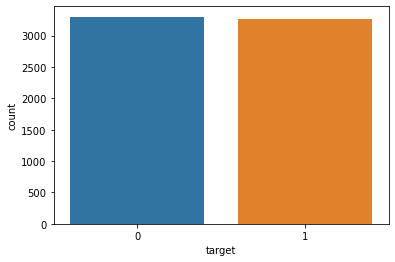

In [116]:
print("-->Show value counts for each class ")
sns.countplot(x="target", data=df_upsampled)#Show the counts of observations in each class bin using bars.
plt.show()#if i remove this line the histogram  will appeare in final 


# 3- Dataset Cleaning
As the text in these samples are tweets, there may be twitter handles or hashtags that are nonsense, but some handles for example could be for an emergency service account which can help us in our prediction. There also may be links in a tweet, which will not be as helpful and we can remove. 

The function will 
* remove the @ and # of handles and hashtags
* set text to lowercase
* remove html characters
* remove Emails ex. sebaiy@gmail.com
* convert apostrophe contractions to their full counterparts ex. i'm ==> i am
* remove hyperlinks
* remove stopwords
* remove punctuation 
* remove weird quirks from tweets such as "û_" and "vÌ_deo"

In [117]:
import html
import re
import nltk
#nltk.download("stopwords")
#nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import ImageColorGenerator
import string

In [118]:
stop_words = set(stopwords.words('english'))

wnl = WordNetLemmatizer()  
set(string.punctuation)
stop_words.add('u')

Apos_dict={"'s":" is","won't":"will not", "can't":"cannot","n't":" not","'m":" am","'ll":" will",
           "'d":" would","'ve":" have","'re":" are"}

def clean_text(text):
    
    text=text.lower()
    
    text=html.unescape(text) # remove html tag words
    
    for key,value in Apos_dict.items(): # remove contractions
        if key in text:
            text = text.replace(key,value)

    text=re.sub(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{1,4}\b", "", text) #emails like (sebaiy.mohamed@gmail.com)
    
    text=re.sub(r"[À-ÿ]+", "", text) #remove sympols like ([À, Ç, Ë,.., ÿ)
    
    text=re.sub(r'https?:\/\/.\S+', "",text)    # remove links
    
    text=re.sub(r'\S*û_*\S*|@\w*|#\w*', "",text) # remove u_, handles and just the hashtag froms hashtags
    
    text=re.sub(r'[0-9]', "", text) #remove numbers

    text=re.sub(r'[^\w\s]', "",text)# remove any character not in the set [^] ie punctuation, can add # | @ here

    no_stopwords = [i for i in  WhitespaceTokenizer().tokenize(text) if i not in stop_words]
    
    n_lemma = [wnl.lemmatize(i, pos= 'n') for i in  no_stopwords] # nouns Lemmatizations
    v_lemma = [wnl.lemmatize(i, pos= 'v') for i in  n_lemma] # verb Lemmatizations
    a_lemma = [wnl.lemmatize(i, pos= 'a') for i in  v_lemma] # adjectives Lemmatizations
    r_lemma = [wnl.lemmatize(i, pos= 'r') for i in  a_lemma] # adverbs Lemmatizations
    s_lemma = [wnl.lemmatize(i, pos= 's') for i in  r_lemma] # satellite adjectives Lemmatization
    
    # remove punctuation
    no_punct = []
    
    for word in s_lemma:
        s = ""
        for ch in word:
            if ch not in set(string.punctuation):
                s = f'{s}{ch}'
        no_punct.append(s)
        
    text = " ".join(no_punct)       
    return text

#print(f"An example\nThe uncleaned tweet: {data['text'].loc[71]}")
#print(f"The cleaned tweet: {clean_text(data['text'].loc[71])}")

In [119]:
cleaned_data = pd.DataFrame()

cleaned_data["text"] = df_upsampled["text"].apply(clean_text)

cleaned_data["target"] = df_upsampled["target"]
cleaned_data.head()

,text,target
1328,burn man ticket vehicle pas full read ebay,0
6520,help survive zombie apocalypse zombie fun run november th,0
5359,though panic disco say,0
747,yo timeline blow damn fast,0
5959,harshness follow u good day sarah c race think scream siren pace back forth,0


# Splitting Data

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection

In [121]:
x_train_data, x_test_data, y_train, y_test = model_selection.train_test_split(cleaned_data["text"], cleaned_data["target"], test_size=0.2, random_state=0)

In [123]:
#print(len(x_test_data))

1315


In [124]:
vectorisers={"tf_idf": TfidfVectorizer(stop_words='english',
                                                          analyzer="word",
                                                          ngram_range=(1,2),
                                                          max_features=None,
                                                          min_df=0.0004)}
vec = vectorisers["tf_idf"]
vec_train = np.array(cleaned_data["text"])
vec = vec.fit(np.array(vec_train))

x_train = vec.transform(np.array(x_train_data))
x_test = vec.transform(np.array(x_test_data))

In [125]:
print(f"Tweet: {cleaned_data['text'][5]}")
print(f"Vectorised tweet:\n{x_train[5]}")

Tweet: update california hwy close direction due lake county fire
Vectorised tweet:
  (0, 2205)	1.0


# Support Vector Machine 

In [126]:
#Import svm model
from sklearn import svm



#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel



#Train the model using the training sets
clf.fit(x_train, y_train)



#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [127]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics



# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7931558935361217


In [128]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8243021346469622
Recall: 0.7526236881559221


In [129]:
def tras(t):
    if t == 0:
        return "Not Disaster"
    return "Disaster"

In [130]:
t = pd.DataFrame({
    "tweet" : x_test_data,
    "True" : y_test,
    "predict" : y_pred 
})
t['True'] = t['True'].apply(tras)
t['predict'] = t['predict'].apply(tras)

t#.head()

,tweet,True,predict
4303,beware temper loose tongue two dangerous weapon combine lead person hellfire,Not Disaster,Not Disaster
3152,myanmar flood childfund international need care aust appeal,Disaster,Not Disaster
6542,whether pressure non wud survive even thalapathi release,Disaster,Not Disaster
4061,pharrell prevent forest fire,Not Disaster,Not Disaster
6111,sink slipper put boot,Not Disaster,Not Disaster
...,...,...,...
663,let know,Not Disaster,Not Disaster
5137,navy sideline new sub,Not Disaster,Not Disaster
2442,death railway track rain cannot take blame derailment common last year le th,Disaster,Disaster
5588,late home raze northern california wildfire abc news,Disaster,Disaster


# Multinomial NB

In [131]:
%%time
from sklearn.naive_bayes import MultinomialNB
myClassifier = MultinomialNB()


#Train the model using the training sets
myClassifier.fit(x_train, y_train)



#Predict the response for test dataset
y_pred = myClassifier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8022813688212928
Wall time: 3.96 ms


In [132]:
t = pd.DataFrame({
    "tweet" : x_test_data,
    "True" : y_test,
    "predict" : y_pred 
})
t['True'] = t['True'].apply(tras)
t['predict'] = t['predict'].apply(tras)

t#.head()

,tweet,True,predict
4303,beware temper loose tongue two dangerous weapon combine lead person hellfire,Not Disaster,Not Disaster
3152,myanmar flood childfund international need care aust appeal,Disaster,Disaster
6542,whether pressure non wud survive even thalapathi release,Disaster,Not Disaster
4061,pharrell prevent forest fire,Not Disaster,Not Disaster
6111,sink slipper put boot,Not Disaster,Not Disaster
...,...,...,...
663,let know,Not Disaster,Not Disaster
5137,navy sideline new sub,Not Disaster,Not Disaster
2442,death railway track rain cannot take blame derailment common last year le th,Disaster,Disaster
5588,late home raze northern california wildfire abc news,Disaster,Disaster


# Logisitic Regression

In [133]:
%%time
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()          
logreg.fit(x_train, y_train)



y_pred = logreg.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


accuracy 0.7992395437262357
Wall time: 53.9 ms


# Random Forest

In [134]:
%%time
from sklearn.ensemble import RandomForestClassifier

RF= RandomForestClassifier()          
RF.fit(x_train, y_train)



y_pred = RF.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


accuracy 0.7992395437262357
Wall time: 4.47 s


# Combination

In [158]:
def compination(tweet,all_classifiers):
    if type(tweet)!=type(x_train):
        tweet = vec.transform(np.array(tweet))
    counter_list = [0,0]
    for i in range(len(all_classifiers)):
        p = all_classifiers[i].predict(tweet)
        if p[0] == 0:
            counter_list[0]+=1
        else:
            counter_list[1]+=1
    if counter_list[0]>counter_list[1]:
        print('Output : ','Non Disater')
        print('Confidence is : ',counter_list[0]/4 * 100)
        return 0
    elif counter_list[0]<counter_list[1]:
        print('Output : ','Disaster')
        print('Confidence is : ',counter_list[1]/4 * 100)
        return 1

    else:
        print('It is Confusing/Tricky')
        t = all_classifiers[1].predict(tweet)
        print(all_classifiers[1].predict(tweet))
        return t[0]

In [159]:
def compination_list(tweet,all_classifiers):
    y_pre =list()
    #counter_list = [0,0]
    #try:
    if type(tweet) != type(x_train):
        tweet = vec.transform(np.array(tweet))
        for i in range(len(list(tweet))):
            y_pre.append(compination(tweet[i],all_classifiers))
        return y_pre
    else:
        for i in range(len(list(tweet))):
            y_pre.append(compination(tweet[i],all_classifiers))
        return y_pre
    #except:
#        print('not converted try again !')
 #       return

In [160]:
a = compination_list(x_test,all_classifiers)

Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  75.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  75.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  75.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  75.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  75.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0


It is Confusing/Tricky
[1]
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  75.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
It is Confusing/Tricky
[1]
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
C

Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
It is Confusing/Tricky
[0]
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  75.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  75.0
Output :  Non Disater
Confidence is :  100.0
It is Confusing/Tricky
[1]
It is Confusing/Tricky
[0]
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output

It is Confusing/Tricky
[1]
Output :  Non Disater
Confidence is :  75.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  75.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  75.0
Output :  Disaster
Confidence is :  75.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non 

Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  75.0
It is Confusing/Tricky
[0]
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  75.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  75.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  75.0
Output :

Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  75.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  75.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
It is Confusing/Tricky
[1]
Output :  Non Disater
Confidence is :  75.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  75.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disa

Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  75.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Non Disater
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  75.0
Output :  Disaster
Confidence is :  100.0
Output :  Disaster
Confidence is :  75.0
Output :  Non Disater
Confidence is :  100.0
Output 

In [161]:
a

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,


In [ ]:
compination_list()

In [75]:
all_classifiers = list()


In [140]:
p = clf.predict(x_test[10])
p

array([1], dtype=int64)

In [76]:
all_classifiers.append(clf)
all_classifiers.append(myClassifier)
all_classifiers.append(logreg)
all_classifiers.append(RF)

In [77]:
all_classifiers

[SVC(kernel='linear'),
 MultinomialNB(),
 LogisticRegression(),
 RandomForestClassifier()]

In [78]:
tweet = ['disaster']
compination(tweet,all_classifiers)

Output :  Disaster
Confidence is :  75.0


In [54]:
# from nltk.classify import ClassifierI
# from statistics import mode

In [55]:
# class VoteClassifier(ClassifierI):
#     def __init__(self, *classifiers):
#         self._classifiers = classifiers

#     def classify(self, features):
#         votes = []
#         for c in self._classifiers:
#             v = c.classify(features)
#             votes.append(v)
#         return mode(votes)

#     def confidence(self, features):
#         votes = []
#         for c in self._classifiers:
#             v = c.classify(features)
#             votes.append(v)

#         choice_votes = votes.count(mode(votes))
#         conf = choice_votes / len(votes)
#         return conf

In [56]:
# voted_classifier = VoteClassifier(clf,
#                                   myClassifier,
#                                   logreg,
#                                   RF)

In [57]:
# print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier,y_test))*100)


In [136]:
try:
    print(5/0)
except:
    print('i can not do it ')

i can not do it 
